Okay, so I need to work on this diabetes dataset. The goal is to predict whether a patient has diabetes based on diagnostic measurements. Let me start by understanding the dataset. The columns are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. Outcome is the target variable, which is binary (0 or 1).

First step: Data Cleaning. I should check for missing values. Looking at the data, I see some zeros in places where they don't make sense, like Glucose, BloodPressure, SkinThickness, Insulin, and BMI. For example, Glucose level can't be zero. These zeros are likely missing values. So I need to handle those. Maybe replace them with the mean or median of the respective columns.

Next, Exploratory Data Analysis (EDA). I should look at distributions of each feature, maybe using histograms. Check the balance of the Outcome variable. If it's imbalanced, I might need to address that later. Also, check correlations between features and the Outcome. Maybe use a heatmap for that.

For feature engineering, I could create new features if needed. But maybe start with the existing ones. Then, split the data into training and testing sets.

For Machine Learning, since it's a binary classification problem, models like Logistic Regression, Random Forest, or SVM could work. I should evaluate them using metrics like accuracy, precision, recall, and ROC-AUC. Maybe start with Logistic Regression as a baseline.

Wait, the Insulin column has a lot of zeros. Maybe that's a problem. Should I drop that column or impute the missing values? Also, some rows have multiple zeros. Maybe removing rows with too many missing values? Or impute them based on other variables.

Let me start by importing the data and checking for missing values. Then, replace zeros in relevant columns with NaN and impute them. After that, do EDA, check distributions, correlations. Then preprocess the data (scaling?), split, train models, and evaluate.

I might also need to handle outliers. For example, high Insulin levels. Maybe use boxplots to detect outliers. But maybe for simplicity, focus on basic steps first.

Oh, also check for duplicates. And ensure data types are correct. The dataset seems small, so cross-validation might be useful to get reliable metrics.

Let me outline the steps more clearly:

1. Load the data.

2. Handle missing values (replace zeros with NaN in relevant columns, then impute).

3. EDA: Distributions, correlations, class balance.

4. Preprocessing: Scaling features, train-test split.

5. Model training: Logistic Regression, Random Forest, etc.

6. Evaluation: Accuracy, confusion matrix, ROC curve.

7. Feature importance analysis.

I need to make sure each step is done correctly. Maybe use Python libraries like pandas, matplotlib, seaborn, scikit-learn. Now, let's put this into code step by step.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [6]:
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

Impute Missing Values
Fill missing values with the median:

In [7]:
for col in columns_to_clean:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-7-058a199889f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


# Exploratory Data Analysis (EDA)
Class Distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

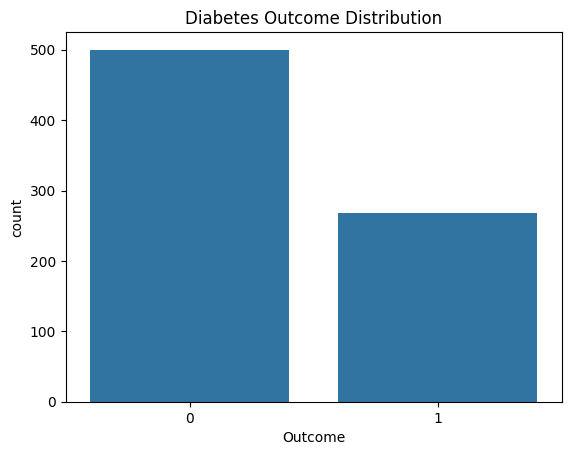

In [9]:
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

Feature Distributions

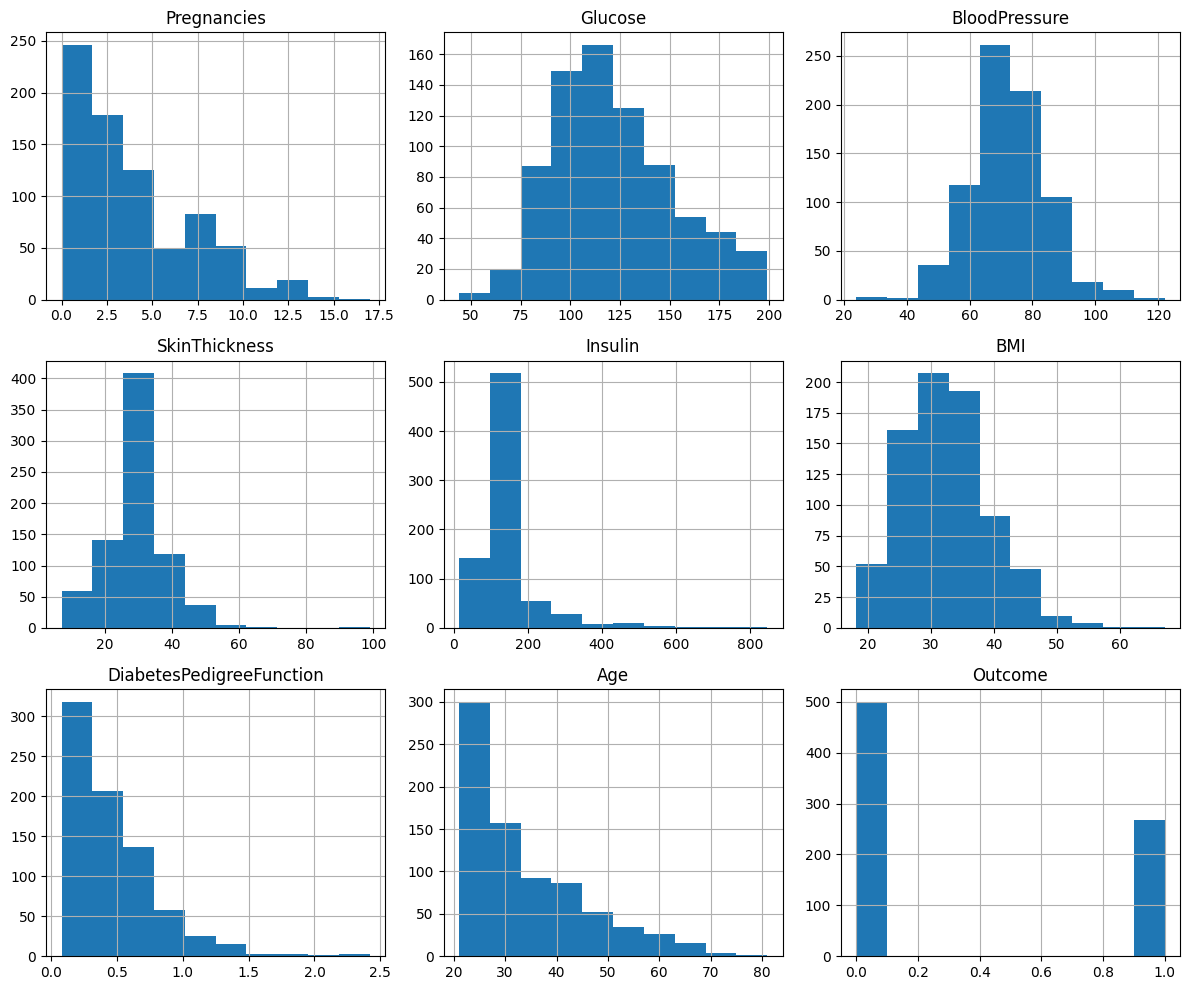

In [10]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Correlation Analysis

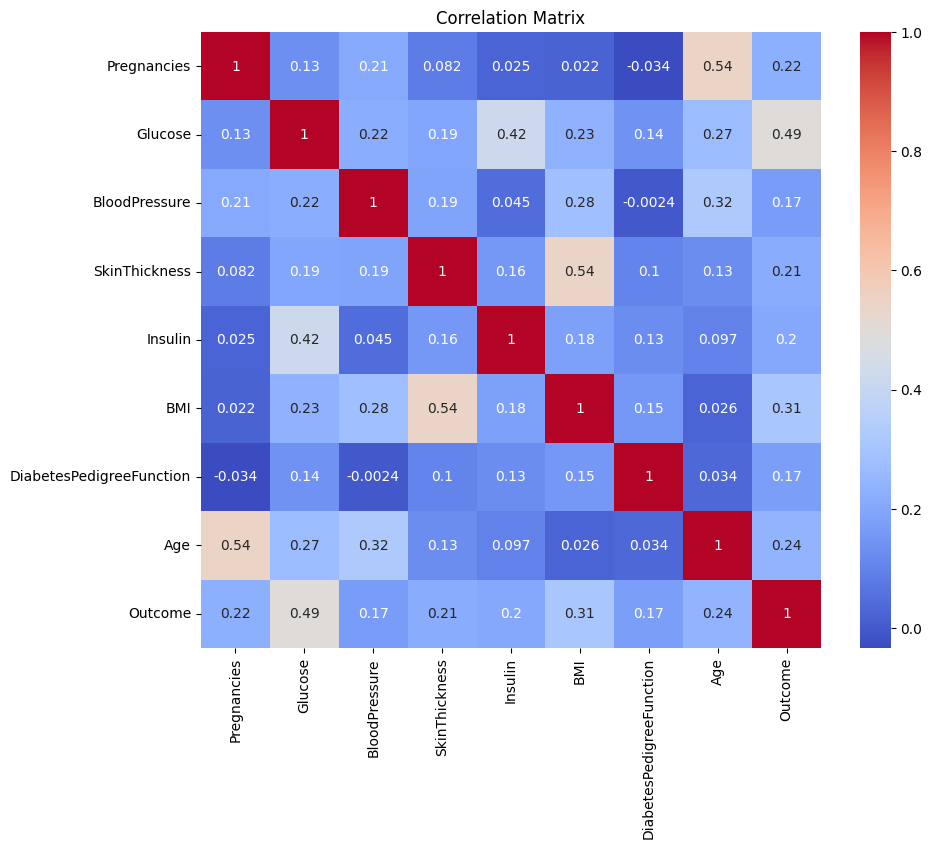

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Insights: High correlation between Glucose and Outcome.


# Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Models

Logistic Regression (Baseline)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



Random Forest (Advanced Model)


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



# Model Evaluation
Confusion Matrix

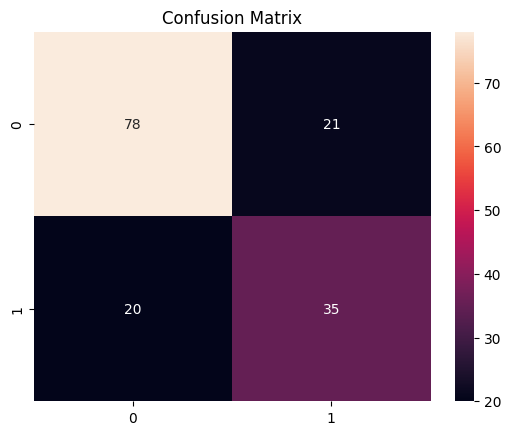

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

Feature Importance


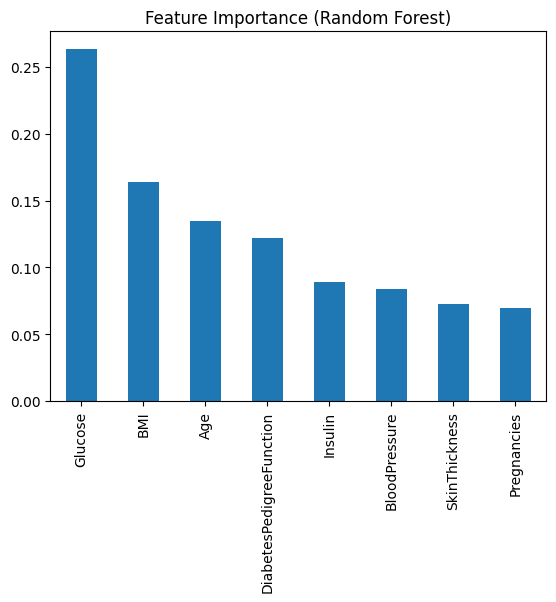

In [17]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.show()

#  Address Class Imbalance
Option A: SMOTE (Synthetic Minority Oversampling)

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
lr = LogisticRegression()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('classifier', lr)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



# Option B: Class Weights

In [19]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter Tuning with GridSearchCV
For Logistic Regression

In [21]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression())
])

params = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear']
}

grid = GridSearchCV(pipeline, params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'lr__C': 0.001, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        99
           1       0.55      0.84      0.67        55

    accuracy                           0.70       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.76      0.70      0.71       154



Random Forest

In [22]:
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='recall')
grid_rf.fit(X_train_scaled, y_train)

print("Best RF parameters:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

Best RF parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



#  Advanced Models
XGBoost with Class Weighting

In [23]:
!pip3 install xgboost

In [24]:
from xgboost import XGBClassifier

scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

